The below problem statement has been taken up from datacamp.com
This notebook contains the entire project description along with the solution to each sub-problem.
This is my original work and it complies with the academy integrity rules of Carnegie Mellon University.


1. The brief
Imagine working for a digital marketing agency, and the agency is approached by a massive online retailer of furniture. They want to test our skills at creating large campaigns for all of their website. We are tasked with creating a prototype set of keywords for search campaigns for their sofas section. The client says that they want us to generate keywords for the following products:

sofas
convertible sofas
love seats
recliners
sofa beds

The brief: The client is generally a low-cost retailer, offering many promotions and discounts. We will need to focus on such keywords. We will also need to move away from luxury keywords and topics, as we are targeting price-sensitive customers. Because we are going to be tight on budget, it would be good to focus on a tightly targeted set of keywords and make sure they are all set to exact and phrase match.

Based on the brief above we will first need to generate a list of words, that together with the products given above would make for good keywords. Here are some examples:

Products: sofas, recliners
Words: buy, prices
The resulting keywords: 'buy sofas', 'sofas buy', 'buy recliners', 'recliners buy', 'prices sofas', 'sofas prices', 'prices recliners', 'recliners prices'.

As a final result, we want to have a DataFrame that looks like this:

Campaign	Ad Group	Keyword	Criterion Type
Campaign1	AdGroup_1	keyword 1a	Exact
Campaign1	AdGroup_1	keyword 1a	Phrase
Campaign1	AdGroup_1	keyword 1b	Exact
Campaign1	AdGroup_1	keyword 1b	Phrase
Campaign1	AdGroup_2	keyword 2a	Exact
Campaign1	AdGroup_2	keyword 2a	Phrase

The first step is to come up with a list of words that users might use to express their desire in buying low-cost sofas.




                                              S T E P  -  1  

The below are the list of the words which I have identified and might be used for the project.
Some additional produts have been added which acts as the same products which the company has mentioned.


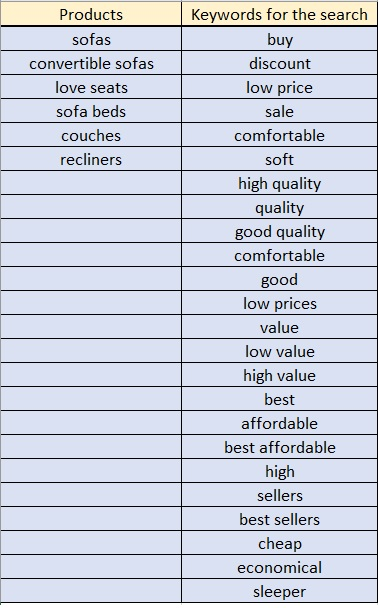


In the above list., we can see that we have two lists from the user, ie.. the products and the keyword lists.
The below operations have been perfomed to remove the 'NaN' objects from the lists. The following code is to generate list which will contain the product name combined with the keyword list.

In [1]:
import pandas as pd


file_path = "D:\ProjectWork\Generating Keywords for Google AdWords\Keywords for online marketing.xlsx"

column_name1 = "Products"

column_name2 = "Keywords for the search"

#TASK 1


def remove_NaN(file_path,column_name):

    file_df = pd.read_excel(file_path)

    list1 = file_df[column_name].tolist()

    list2 = pd.isnull(list1)

    i = 0

    products_str = []

    for i in range(len(list2)):

        get_val = list2[i]

        if get_val == False:

            if i == 0:

                products_str = list1[i] + "#"

            else:

                products_str = products_str + list1[i] + "#"

    products = products_str.split("#")

    return products

i = 0

j = 0

def mix_keyword_product(keyword_list_index_max, get_product_name):

    for i in range(keyword_list_index_max):

        get_keyword_name = keyword_list[i]

        if i == 0:

            possible_phrases = get_product_name + " " + get_keyword_name + "#" + get_keyword_name + " " + get_product_name + "#"


        else:

            possible_phrases = possible_phrases + " " + get_product_name + " " + get_keyword_name + "#"

            possible_phrases = possible_phrases + " " + get_keyword_name + " " + get_product_name + "#"

    return possible_phrases


def calculate_criterion_type(keyword_list_index_max, get_product_name):
    for i in range(keyword_list_index_max):

        get_keyword_name = keyword_list[i]

        if i == 0:

            criterion_type = "Exact" + "#" + "Phrase" + "#"


        else:

            criterion_type = criterion_type + "Exact" + "#"

            criterion_type = criterion_type + "Phrase" + "#"

    return criterion_type


products = remove_NaN(file_path,column_name1)

keyword_list = remove_NaN(file_path,column_name2)


#TASK_2

products_index_max = len(products)-1

keyword_list_index_max = len(keyword_list)-1

array_max_capacity = products_index_max * keyword_list_index_max


for j in range((products_index_max)):

    productname = products[j]

    if j == 0:

        possible_phrases = mix_keyword_product(keyword_list_index_max, productname)

        criterion_type_string = calculate_criterion_type(keyword_list_index_max, productname)
    else:

        possible_phrases = possible_phrases + mix_keyword_product(keyword_list_index_max, productname)

        criterion_type_string = criterion_type_string + calculate_criterion_type(keyword_list_index_max, productname)



possible_phrases = possible_phrases.split("#")

possible_phrases.pop(-1)

criterion_type = criterion_type_string.split("#")

criterion_type.pop(-1)


i = 0

for items in possible_phrases:

    get_value = items

    get_value = get_value.strip()

    if i == 0:

        buffer_string = get_value

    else:

        buffer_string = buffer_string + "#" + get_value

    i = i+1


possible_phrases = buffer_string.split("#")

possible_phrases_df = pd.DataFrame(possible_phrases)

product_divisor = len(possible_phrases)/(len(products) - 1)

product_divisor = int(product_divisor)

i = 0

j = 0

k = 0

for i in range(len(products) - 1):

    for j in range(product_divisor):

        get_val = products[i]

        if i == 0:
            #print("The value of i is "+str(i)+" and the value of iterator is "+get_val)

            if(k>0):

                combined_string = combined_string + get_val + "#"

                campaign_string = campaign_string + "Campaign1" + "#"

            else:

                combined_string = get_val + "#"

                campaign_string = "Campaign1" + "#"
                
            k = k + 1

        else:

            combined_string = combined_string + get_val + "#"

            campaign_string = campaign_string + "Campaign1" + "#"


combined_string = combined_string.split("#")

campaign_list = campaign_string.split("#")

combined_string.pop(-1)

final_df = pd.DataFrame(list(zip(campaign_list,combined_string, possible_phrases,criterion_type)),columns=['Campaign','Products','Possible Keywords','Criterion Type'])

print(final_df)


      Campaign   Products          Possible Keywords Criterion Type
0    Campaign1      sofas                  sofas buy          Exact
1    Campaign1      sofas                  buy sofas         Phrase
2    Campaign1      sofas             sofas discount          Exact
3    Campaign1      sofas             discount sofas         Phrase
4    Campaign1      sofas            sofas low price          Exact
5    Campaign1      sofas            low price sofas         Phrase
6    Campaign1      sofas                 sofas sale          Exact
7    Campaign1      sofas                 sale sofas         Phrase
8    Campaign1      sofas          sofas comfortable          Exact
9    Campaign1      sofas          comfortable sofas         Phrase
10   Campaign1      sofas                 sofas soft          Exact
11   Campaign1      sofas                 soft sofas         Phrase
12   Campaign1      sofas         sofas high quality          Exact
13   Campaign1      sofas         high quality s

The above code has been written to determine the DataFrame of a campaign, which would be used by other business developers to determine the possible keywords with specific product section along with the correct campaign. This work has been limited to exact match and the phrase match. There is a further scope of negative match and broad match in the online marketing campaign.